In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

In [5]:
iris=datasets.load_iris()

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


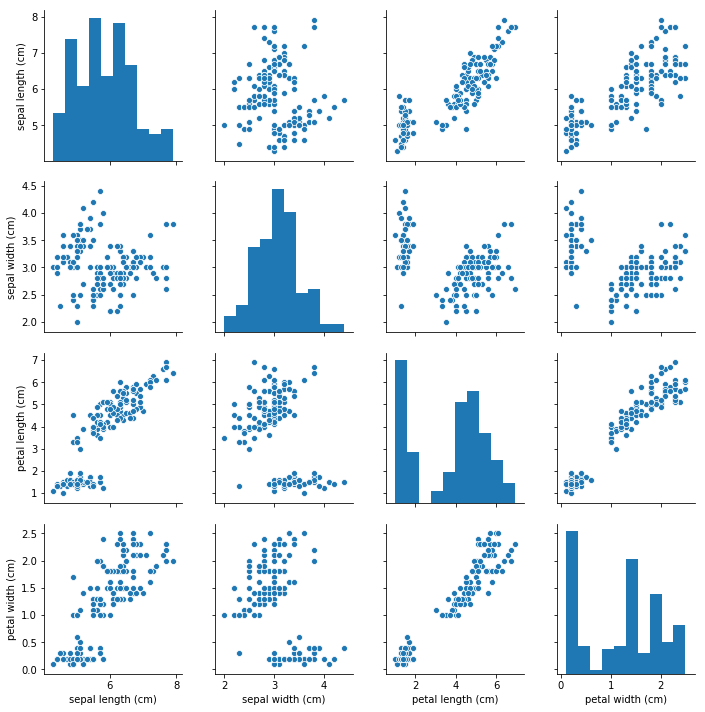

In [9]:
import seaborn as sns
sns.pairplot(df)
# i am taking the complete df for analysis

In [10]:
# taking 14 neighbours for calculation
number_of_neighbours=14

In [51]:
X=iris.data

In [52]:
y=iris.target

In [53]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [54]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [62]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=14)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [63]:
y_pred = classifier.predict(X_test)  

In [64]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 5  0  0]
 [ 0 11  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.79      0.88        14
           2       0.79      1.00      0.88        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.92      0.90      0.90        30



In [70]:
prediction=classifier.predict([[2.1,3.5,1.4,0.8]])

In [71]:
prediction

array([2])

In [74]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn import preprocessing

n_neighbors = 6

# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# make prediction
sl = input('Enter sepal length (cm): ')
sw = input('Enter sepal width (cm): ')
dataClass = clf.predict([[sl,sw]])
print('Prediction: '),

if dataClass == 0:
    print('Iris Setosa')
elif dataClass == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')


Enter sepal length (cm): 1.5
Enter sepal width (cm): 0.5
Prediction: 
Iris Setosa


/home/shawak/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/shawak/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


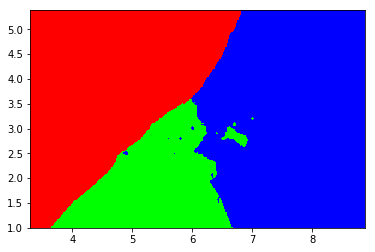

In [78]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_bold)